### Holiday Package Prediction

##### Life cycle of Machine Learning Project
- Understanding the Problem Statement
- Data Collection
- Data Cleaning
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

#### 1) Problem Statement.
- "Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base.
- One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.
- The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.
- However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

#### 2) Data Collection.
- The Dataset is collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction
- The dataset consists of 20 columns and 4888 rows.

##### 2.1 Import Data and Required Packages

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

##### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv(r"Travel.csv")

##### Show Top 5 Records

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.Designation.unique()

array(['Manager', 'Executive', 'Senior Manager', 'AVP', 'VP'],
      dtype=object)

##### Shape of the Dataset

In [5]:
df.shape

(4888, 20)

##### Information of the dataset 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

##### Summary of the Dataset

In [7]:
# Display the summary of the statistics for a dataframe
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


#### 3. Exploring Data

In [9]:
# define numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

# print features
print("We have {} numerical features: {}".format(len(numerical_features), numerical_features))
print("\nWe have {} categorical features: {}".format(len(categorical_features), categorical_features))

We have 14 numerical features: ['CustomerID', 'ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting', 'MonthlyIncome']

We have 6 categorical features: ['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


##### Feature Information
- TypeofContact: How customer was contacted (Company Invited or Self Inquiry).
- CityTier: City tier depends on the development of a city, population, facilities, and living standards.
- DurationOfPitch: Duration of the pitch by a salesperson to the customer.
- NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch.
- ProductPitched: Product pitched by the salesperson.
- Passport: The customer has a passport or not (0: No, 1: Yes)
- NumberOfTrips: Average number of trips in a year by customer.
- PreferredPropertyStar: Preferred hotel property rating by customer.

In [10]:
# Unique value counts of each category in categorical columns
for col in categorical_features:
    print(df[col].value_counts())
    print("-----------------------")

Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
-----------------------
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
-----------------------
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
-----------------------
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
-----------------------
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
-----------------------
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64
-----------------------


In [11]:
# percentage of each category in categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print("---------------------------------")

Self Enquiry       70.820481
Company Invited    29.179519
Name: TypeofContact, dtype: float64
---------------------------------
Salaried          48.445172
Small Business    42.635025
Large Business     8.878887
Free Lancer        0.040917
Name: Occupation, dtype: float64
---------------------------------
Male       59.656301
Female     37.172668
Fe Male     3.171031
Name: Gender, dtype: float64
---------------------------------
Basic           37.684124
Deluxe          35.433715
Standard        15.180033
Super Deluxe     6.996727
King             4.705401
Name: ProductPitched, dtype: float64
---------------------------------
Married      47.872340
Divorced     19.435352
Single       18.739771
Unmarried    13.952537
Name: MaritalStatus, dtype: float64
---------------------------------
Executive         37.684124
Manager           35.433715
Senior Manager    15.180033
AVP                6.996727
VP                 4.705401
Name: Designation, dtype: float64
------------------------------

##### Observation:-
- Spelling Error in gender column.

#### Univariate Analysis

- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

##### Numerical features

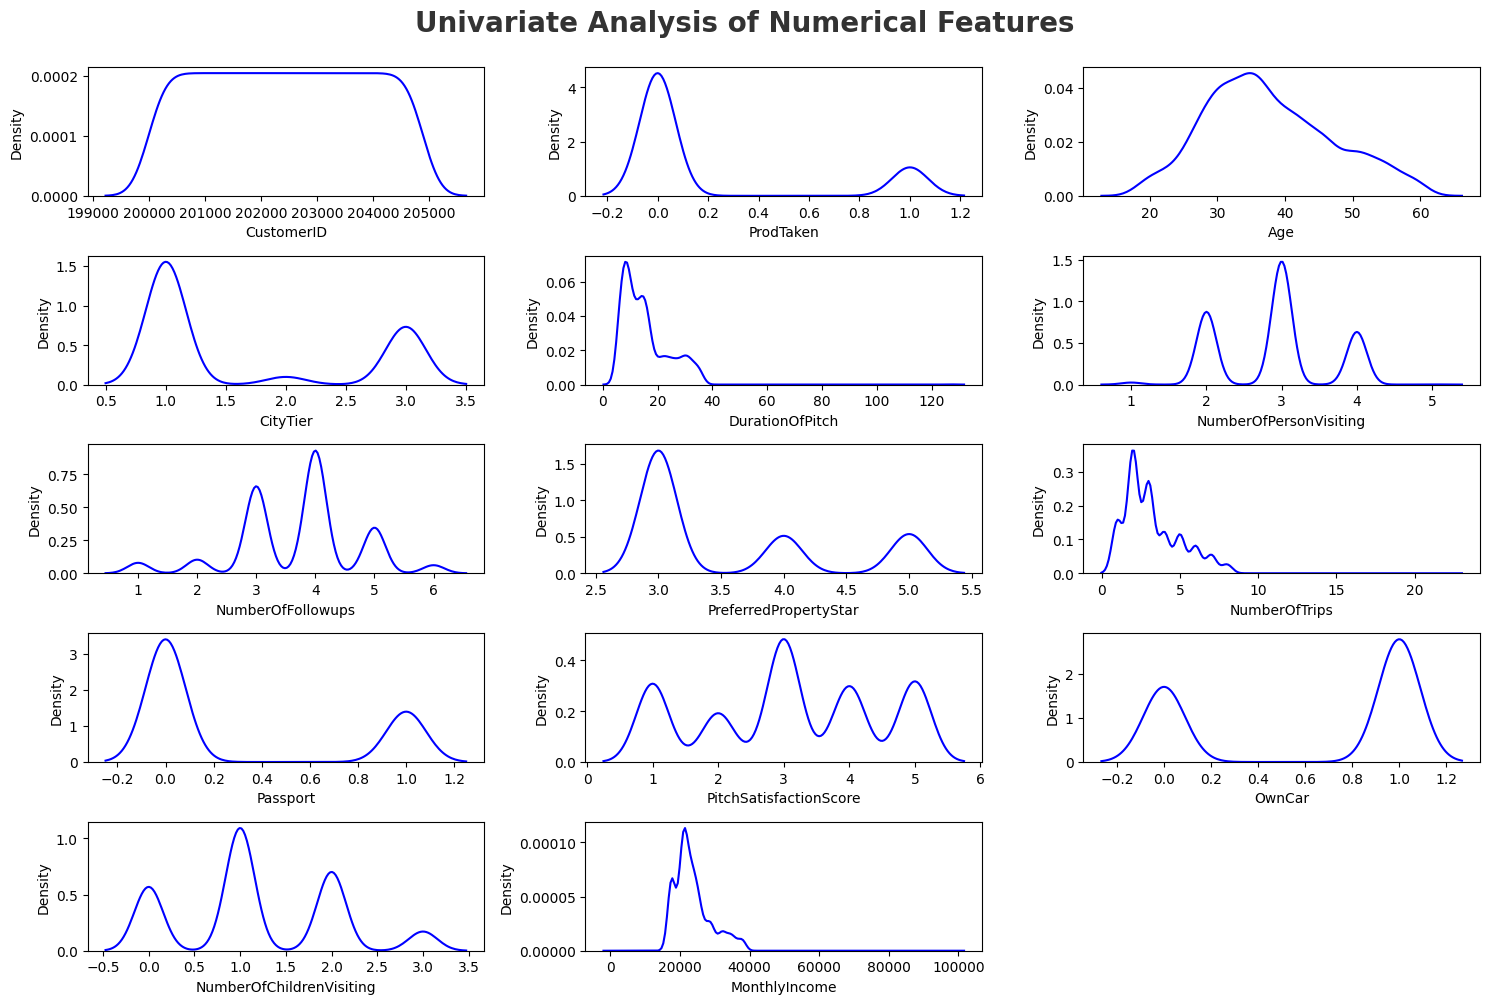

In [12]:
plt.figure(figsize=(15,10))
plt.suptitle(
    "Univariate Analysis of Numerical Features",
    fontsize = 20,
    fontweight = "bold",
    alpha = 0.8,
    y = 1.0,
)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i + 1)
    sns.kdeplot(x=df[numerical_features[i]], color="blue")
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

# Save plot
# plt.savefig('./images/Univariate_NUM.png')

##### Observations:-
- Age, MonthlyIncome, DurationOfPitch are the only continuous features.
- OwnCar, CityTier, Passport, ProdTaken are the Categorical features but they are encoded.
- NumberOfPersonVisiting, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, PitchSatisfactionScore, NumberOfChildrenVisiting are Discrete features.

#### Categorical Features

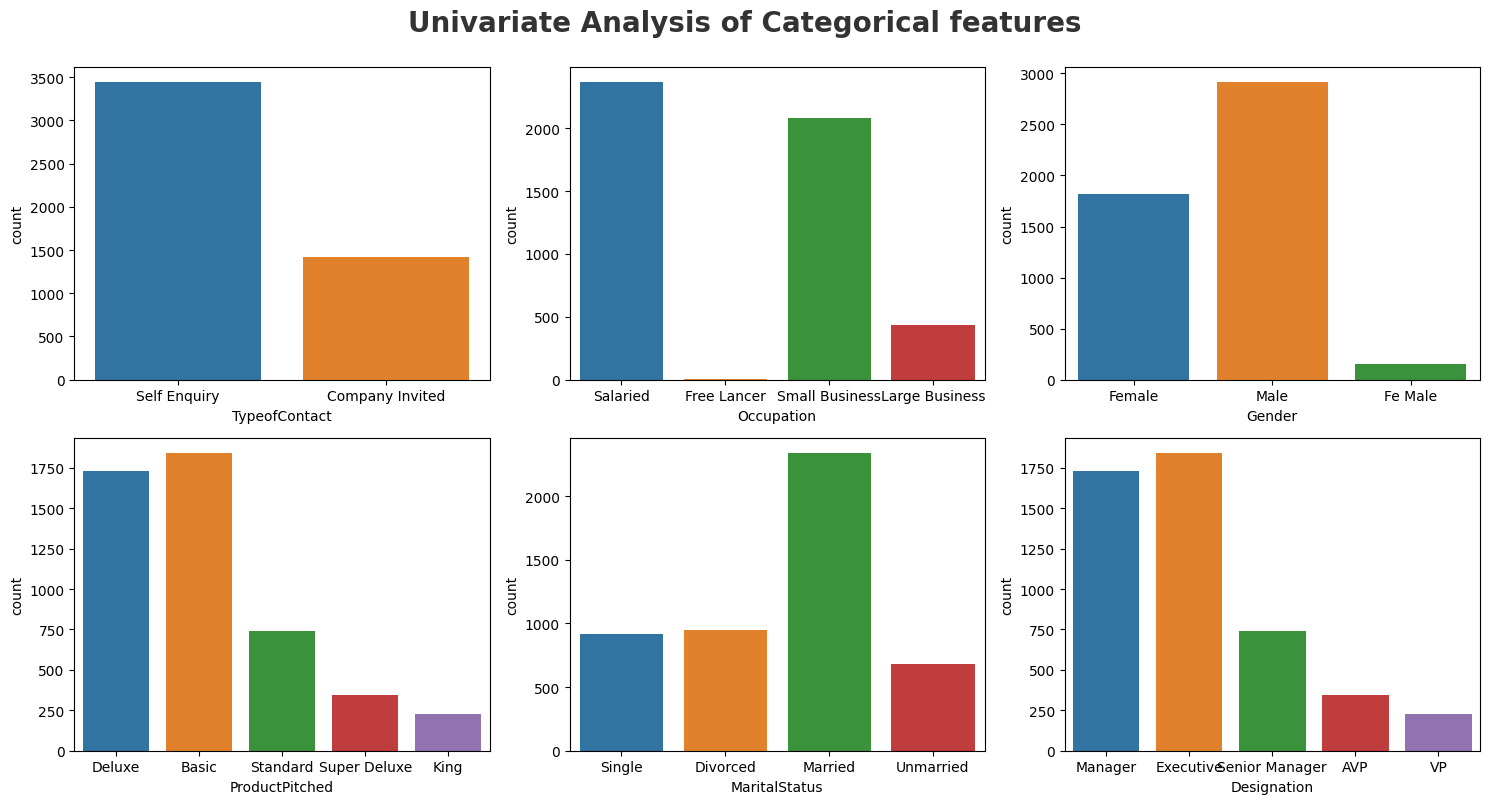

In [13]:
# Categorical columns
plt.figure(figsize=(15,8))
plt.suptitle(
    "Univariate Analysis of Categorical features",
    fontsize = 20,
    fontweight = "bold",
    alpha = 0.8,
    y = 1.0,
)

for i in range(0, len(categorical_features)):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

# save plot
# plt.savefig('./images/Univariate_Cat.png')


##### Observations:- 
- Gender has a Duplicate column for Female
- Free Lancer has very less count 

#### Multivariate Analysis
- Multivariate analysis is the analysis of more than one variable.

In [14]:
discrete_features = [
    feature 
    for feature in numerical_features
    if (len(df[feature].unique()) <= 25 and len(df[feature].unique())> 3)
]

continuous_features = [
    feature 
    for feature in numerical_features
    if len(df[feature].unique()) > 25
]

encoded_categorical = [
    feature 
    for feature in numerical_features
    if len(df[feature].unique()) <= 3
]

print("We have {} discrete features: {}".format(len(discrete_features), discrete_features))

print("We have {} continuous features: {}".format(len(continuous_features), continuous_features))

print("We have {} encoded_categorical: {}".format(len(encoded_categorical), encoded_categorical))

We have 6 discrete features: ['NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'PitchSatisfactionScore', 'NumberOfChildrenVisiting']
We have 4 continuous features: ['CustomerID', 'Age', 'DurationOfPitch', 'MonthlyIncome']
We have 4 encoded_categorical: ['ProdTaken', 'CityTier', 'Passport', 'OwnCar']


In [15]:
categorical_features = categorical_features + encoded_categorical
print(categorical_features)

['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation', 'ProdTaken', 'CityTier', 'Passport', 'OwnCar']


##### Check Multicollinearity in Numerical features

In [16]:
df[continuous_features].columns

Index(['CustomerID', 'Age', 'DurationOfPitch', 'MonthlyIncome'], dtype='object')

In [17]:
df[list(df[continuous_features])[1:]].corr()

,Age,DurationOfPitch,MonthlyIncome
Age,1.000000,-0.012063,0.464869
DurationOfPitch,-0.012063,1.000000,-0.006252
MonthlyIncome,0.464869,-0.006252,1.000000


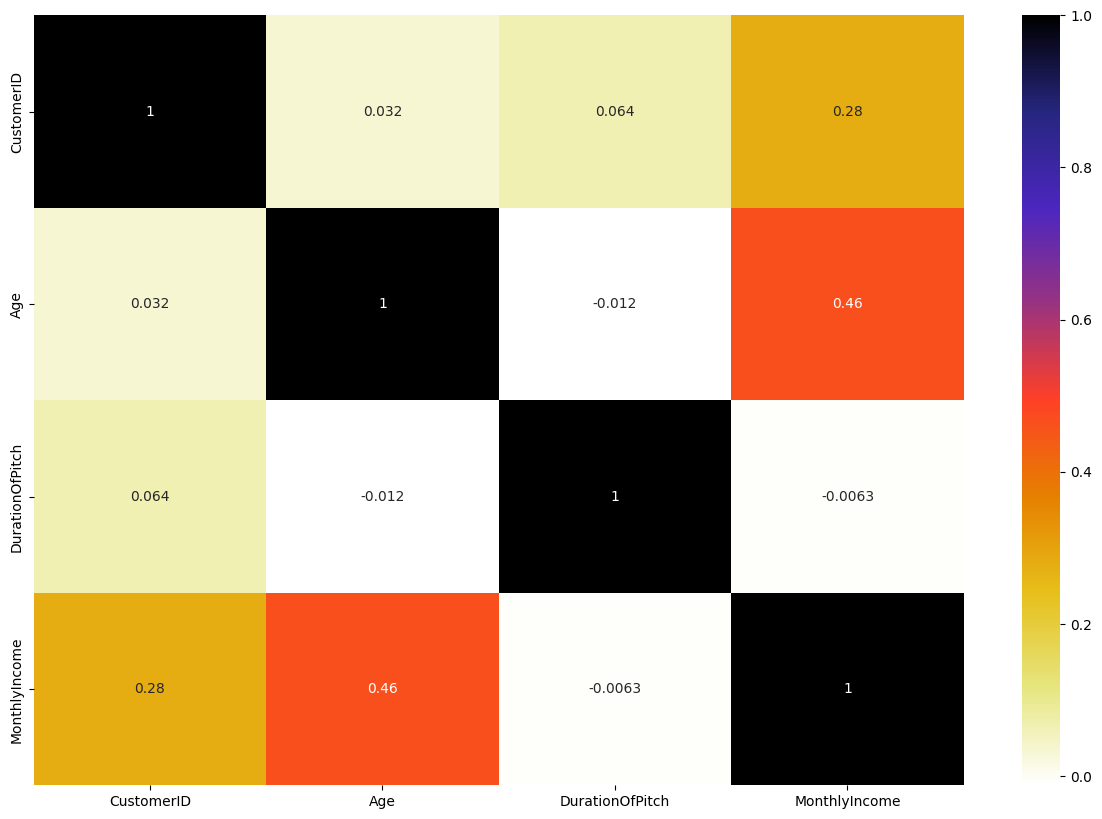

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(df[continuous_features].corr(), cmap="CMRmap_r", annot=True)
plt.show()

##### Observations:-
- There is no multicollinearity present in the dataset.

#### Check Multicollinearity For Categorical Features
- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

- A chi-square statistic is one way to show a relationship between two categorical variables.

- Here we test correlation of Categorical columns with Target column i.e ProdTaken

Null Hypothesis (H0
): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (H1
): The Feature and Target column are not independent (Correlated)

In [19]:
from scipy.stats import chi2_contingency

chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['ProdTaken'], df[feature]))[1] < 0.05:
        chi2_test.append("Reject Null Hypothesis")
    else:
        chi2_test.append("Fail to Reject Null Hypothesis")
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ["Column", "Hypothesis Result"]
result

,Column,Hypothesis Result
0,TypeofContact,Reject Null Hypothesis
1,Occupation,Reject Null Hypothesis
2,Gender,Fail to Reject Null Hypothesis
3,ProductPitched,Reject Null Hypothesis
4,MaritalStatus,Reject Null Hypothesis
5,Designation,Reject Null Hypothesis
6,ProdTaken,Reject Null Hypothesis
7,CityTier,Reject Null Hypothesis
8,Passport,Reject Null Hypothesis
9,OwnCar,Fail to Reject Null Hypothesis


##### Observations:-
- Gender and OwnCar are independent of the target column (Not-correlated with target)

#### Checking the Null Values

In [20]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

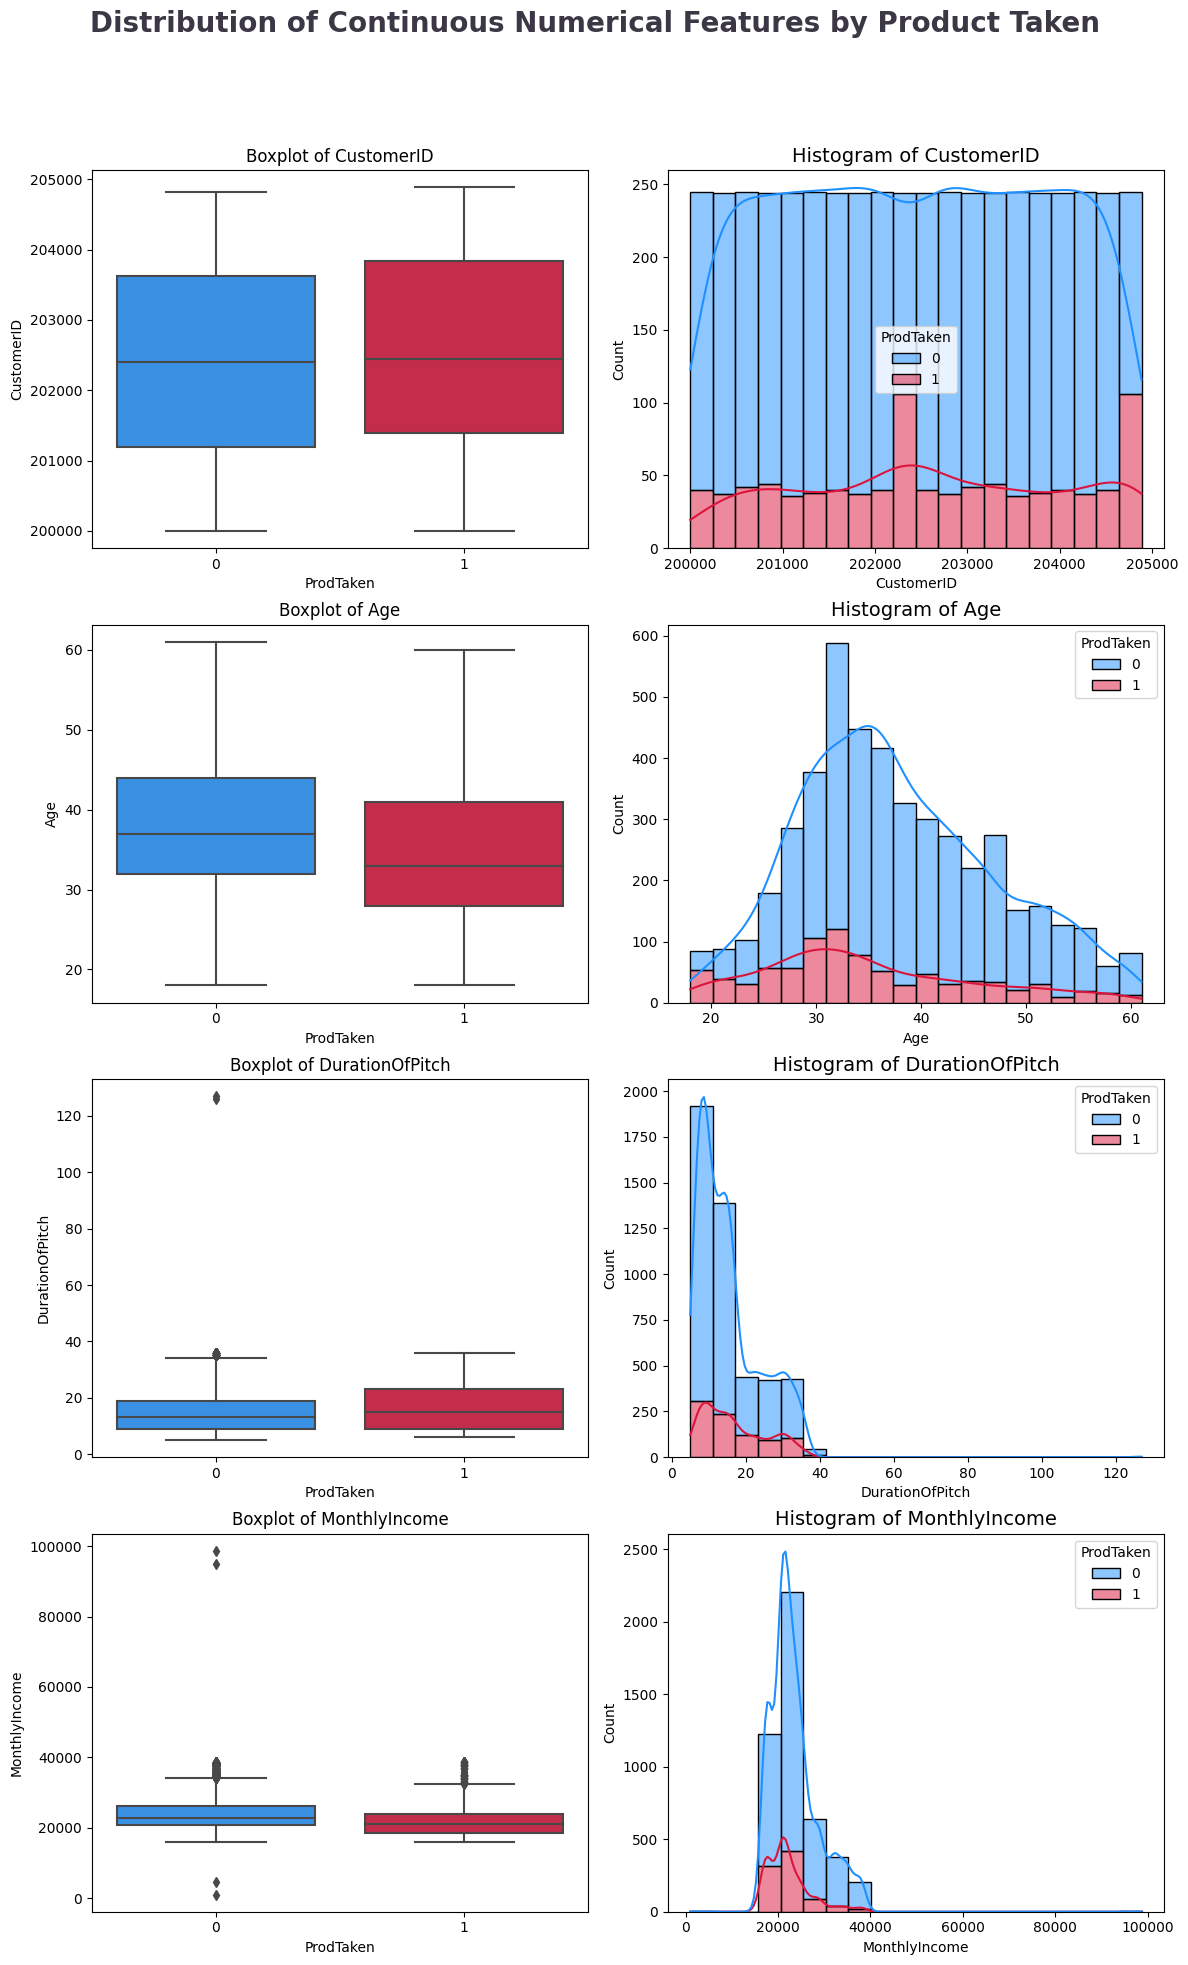

In [21]:
clr1 = ["#1E90FF", "#DC143C"]
fig, ax = plt.subplots(4, 2, figsize=(12,20))
fig .suptitle(
    "Distribution of Continuous Numerical Features by Product Taken",
    color = "#3C3744",
    fontsize = 20,
    fontweight = "bold",
    ha = "center",
)
for i, col in enumerate(continuous_features):
    sns.boxplot(data=df, x="ProdTaken", y=col, palette=clr1, ax=ax[i, 0])
    ax[i, 0].set_title(f"Boxplot of {col}", fontsize=12)
    sns.histplot(
        data=df,
        x=col,
        hue="ProdTaken",
        bins=20,
        kde=True,
        multiple="stack",
        palette=clr1,
        ax=ax[i, 1],
    )
    ax[i, 1].set_title(f"Histogram of {col}", fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
# plt.savefig('images/multivariate_num.png')

##### Observations:-
- In the CustomerID column has unique value for each row, it can be ignored as a feature.
- Customers with MonthlyIncome ranging from 150000 to 250000 are more likely buying the travel pacakge.
- Pitch Duration that sales team do under 20 minutes made more sales.

### Initial Analysis Report

- There are missing values in the Age, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome, TypeofContact columns.
- The CustomerID column can be deleted because each row has unique values.
- OwnCar and Gender columns are not correlated with Prodtaken (Target Column)
- The ProdTaken column is the target to predict.
- In the Categorical column, features can be entered, namely TypeofContact, Occupation, ProductPitched, MaritalStatus, and Designation because based on the results of hypothesis testing using chi-square successfully rejects H0 (meaning it is correlated with the target)

#### 4 Visualization
##### 4.1 Visualize the Target Feature

In [22]:
df1 = df.copy()
df1['ProdTaken'] = np.where((df.ProdTaken == 1), "Purchased", "Not-Purchased")

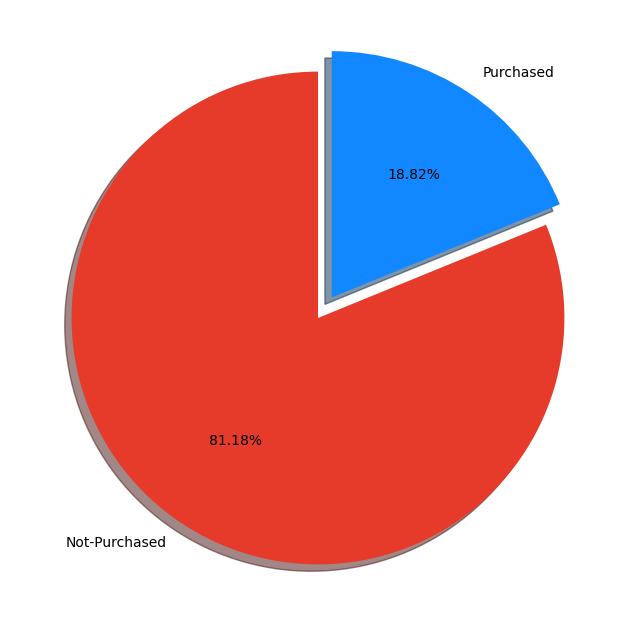

In [23]:
percentage = df1.ProdTaken.value_counts(normalize=True) * 100
labels = ["Not-Purchased", "Purchased"]

# Plot PieChart with Policy library
fig, ax = plt.subplots(figsize=(15, 8))
explode = (0, 0.1)
colors = ["#e63a2a", "#1188ff"]
ax.pie(
    percentage,
    labels=labels,
    startangle=90,
    autopct="%1.2f%%",
    explode=explode,
    shadow=True,
    colors=colors,   
)
plt.show()

##### Observations:-
- From the chart it is clear that the Target Variable is Imabalanced.
- What is Imbalanced data?

Imbalanced data are types of data where the target class has an uneven distribution of observations, i.e Here Not-Purchased value has more count than the Purchased value of the dataset.

##### 4.2 Do Men Or Women who Purchased more?

In [24]:
df1.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [25]:
df1[df1.ProdTaken == "Purchased"].Gender.value_counts(normalize=True)

Male       0.628261
Female     0.344565
Fe Male    0.027174
Name: Gender, dtype: float64

In [26]:
df1[df1.ProdTaken == "Purchased"].Gender.value_counts(normalize=True) * 100

Male       62.826087
Female     34.456522
Fe Male     2.717391
Name: Gender, dtype: float64

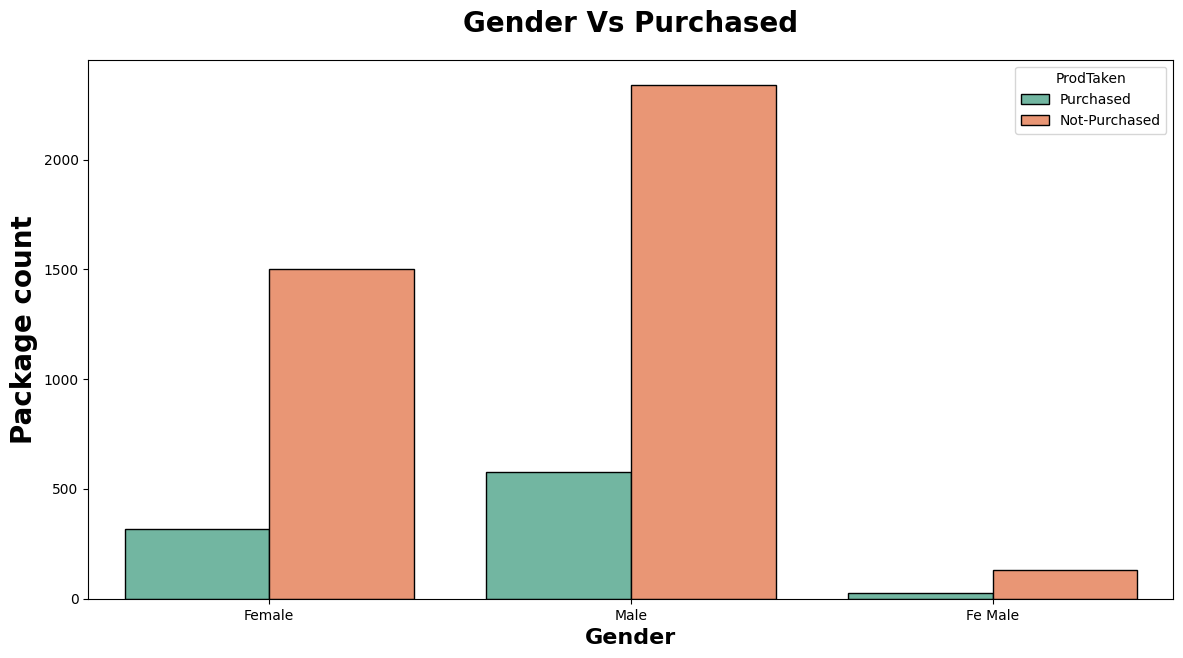

In [27]:
plt.subplots(figsize=(14, 7))
sns.countplot(x="Gender", hue="ProdTaken", data=df1, ec="black", palette="Set2")
plt.title("Gender Vs Purchased", weight="bold", fontsize=20, pad=20)
plt.ylabel("Package count", weight="bold", fontsize=20)
plt.xlabel("Gender", weight="bold", fontsize=16)
plt.show()

##### Observations:-
- As per the Chart Male Customers Purchased more than Female Customers.
- 37% Female customers and 63% Male customers.
- This Feature has impact on the Target Variable.



- Our Insights from Chi2 test is that gender column is not correlated with target column, which conterdicts the above plot which says that they are dependent.
- This may be because of that duplicate category in the column. Now let's replace and check the Chi2 score again.

In [28]:
df1.Gender.replace("Fe Male", "Female", inplace=True)

In [29]:
if chi2_contingency(pd.crosstab(df1["ProdTaken"], df1["Gender"]))[1] < 0.05:
    print("Gender column Reject Null Hypothesis.")
else:
    print("Gender column Fail to Reject Null Hypothesis.")

Gender column Reject Null Hypothesis.


##### Observations:-
- As seen in visualization and Chi2 test Gender column is correlated with target feature.

#### AGE Category Split

In [30]:
bins = [10, 20, 50, 70]
labels = ["Teens", "Adult", "Senior"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)
age_group = (
    df.groupby(["AgeGroup", "ProdTaken"])["CustomerID"].count().reset_index(name="TotalCustomer")
)
age_group

,AgeGroup,ProdTaken,TotalCustomer
0,Teens,0,17
1,Teens,1,29
2,Adult,0,3235
3,Adult,1,746
4,Senior,0,534
5,Senior,1,101


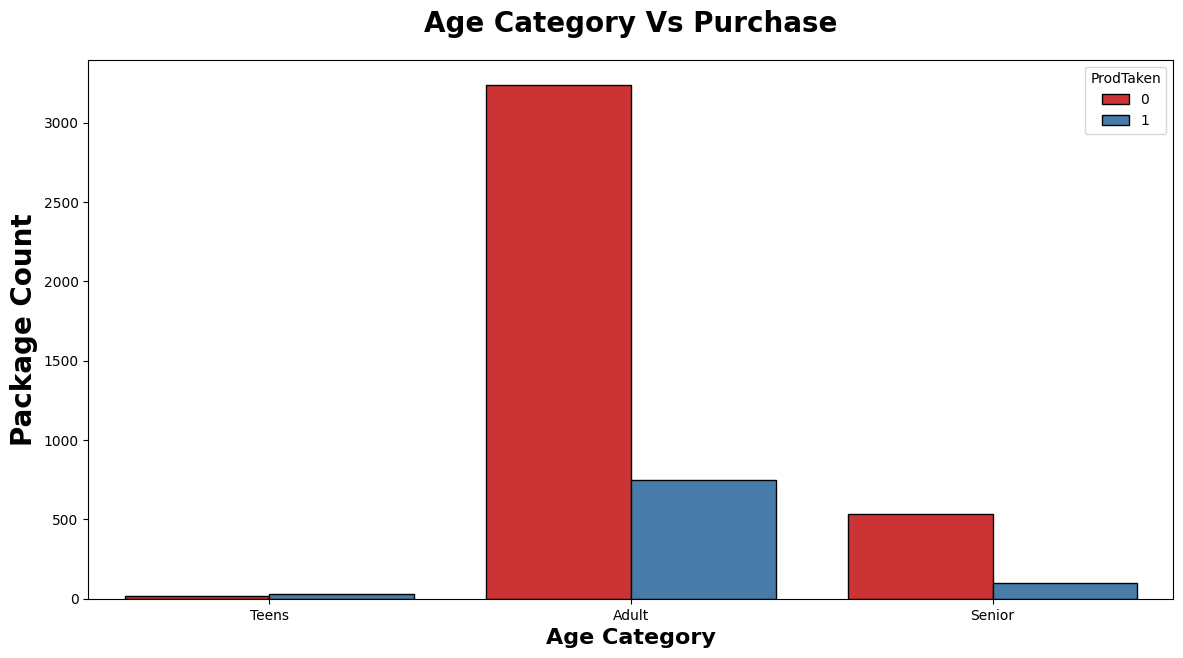

In [31]:
plt.subplots(figsize=(14, 7))
sns.countplot(x="AgeGroup", hue="ProdTaken", data=df, ec="black", palette="Set1")
plt.title("Age Category Vs Purchase", weight="bold", fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Age Category", weight="bold", fontsize=16)
plt.show()

##### Observations:- 
- As per the Chart Adult age Group has the most share of purchase.
- The AgeGroup is 20-50 years old.

##### 4.3 DO Maritial Status has any effect on Purchasing of Product

In [32]:
df.groupby("MaritalStatus").ProdTaken.value_counts(normalize=True)

MaritalStatus  ProdTaken
Divorced       0            0.869474
               1            0.130526
Married        0            0.860684
               1            0.139316
Single         0            0.668122
               1            0.331878
Unmarried      0            0.756598
               1            0.243402
Name: ProdTaken, dtype: float64

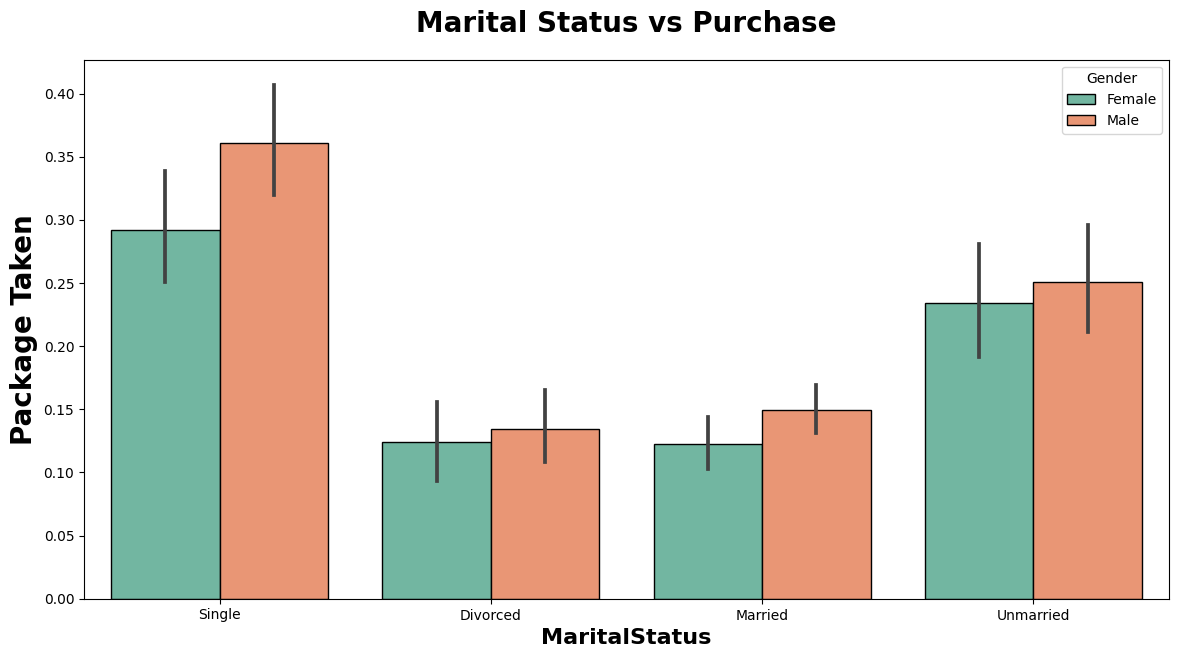

In [33]:
plt.subplots(figsize=(14,7))
df['Gender'] = df['Gender'].replace("Fe Male", "Female")
sns.barplot(
    x="MaritalStatus", y="ProdTaken", hue="Gender", data=df, ec="black", palette="Set2"
)
plt.title("Marital Status vs Purchase", weight="bold", fontsize=20, pad=20)
plt.ylabel("Package Taken", weight="bold", fontsize=20)
plt.xlabel("MaritalStatus", weight="bold", fontsize=16)
plt.show()

##### Observations:-
- As per the Chart Male and Female customers who are Single has Purchased more than Divorced and Married and UnMarried.
- 33.18% of Single Customers, 24% of UnMarried Customers
- Followed by approx 13% of Divorced and Married Customers

##### 4.4 Duration of Pitch Vs Product Purchase

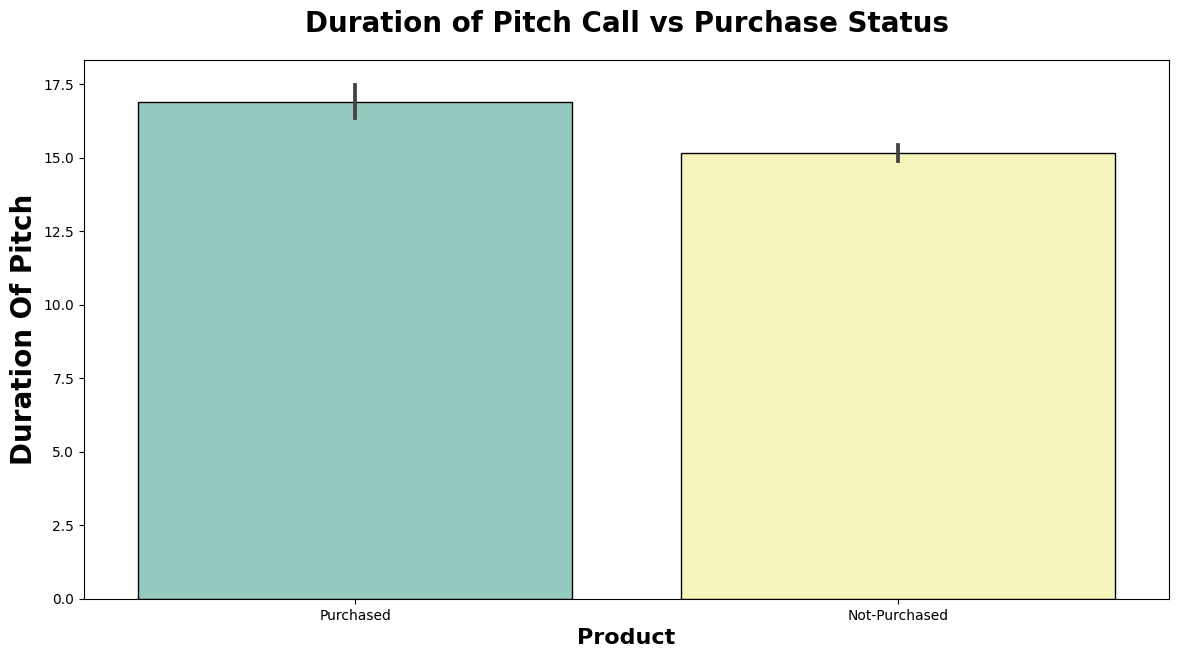

In [34]:
plt.subplots(figsize=(14, 7))
sns.barplot(x="ProdTaken", y="DurationOfPitch", data=df1, ec="black", palette="Set3")
plt.title(
    "Duration of Pitch Call vs Purchase Status", weight="bold", fontsize=20, pad=20
)
plt.ylabel("Duration Of Pitch", weight="bold", fontsize=20)
plt.xlabel("Product", weight="bold", fontsize=16)
plt.show()

In [35]:
pitch_less_10_and_taken = (
    df.loc[(df["DurationOfPitch"] < 10) & (df["ProdTaken"] == 1)]
).shape[0]
pitch_less_10_and_not_taken = (
    df.loc[(df["DurationOfPitch"] < 10) & (df["ProdTaken"] == 0)]
).shape[0]

pitch_between_10_30_and_taken = df.loc[
    (df["DurationOfPitch"] < 30) & (df["ProdTaken"] == 1) & (df["DurationOfPitch"] > 10)
].shape[0]
pitch_between_10_30_and_not_taken = df.loc[
    (df["DurationOfPitch"] < 30) & (df["ProdTaken"] == 0) & (df["DurationOfPitch"] > 10)
].shape[0]

pitch_more_than_30_and_taken = df.loc[
    (df["DurationOfPitch"] > 30) & (df["ProdTaken"] == 1)
].shape[0]
pitch_more_than_30_and_not_taken = df.loc[
    (df["DurationOfPitch"] > 30) & (df["ProdTaken"] == 0)
].shape[0]

In [36]:
total_package_taken = (df.loc[(df["ProdTaken"] == 1)]).shape[0]

print(
    f"Total {pitch_less_10_and_taken + pitch_less_10_and_not_taken} Pitch for less than 10 minutes and {pitch_less_10_and_taken} were bought which is about {pitch_less_10_and_taken/(pitch_less_10_and_taken + pitch_less_10_and_not_taken)*100:.2f}%"
)
print(
    f"Total {pitch_between_10_30_and_taken + pitch_between_10_30_and_not_taken} Pitch for between 10 and 30 minutes and {pitch_between_10_30_and_taken} were bought which is about {pitch_between_10_30_and_taken/(pitch_between_10_30_and_taken + pitch_between_10_30_and_not_taken)*100:.2f}%"
)
print(
    f"Total {pitch_more_than_30_and_taken + pitch_more_than_30_and_not_taken} Pitch for more than 30 minutes and {pitch_more_than_30_and_taken} were bought which is about {pitch_more_than_30_and_taken/(pitch_more_than_30_and_taken + pitch_more_than_30_and_not_taken)*100:.2f}%"
)

Total 1471 Pitch for less than 10 minutes and 226 were bought which is about 15.36%
Total 2451 Pitch for between 10 and 30 minutes and 488 were bought which is about 19.91%
Total 376 Pitch for more than 30 minutes and 86 were bought which is about 22.87%


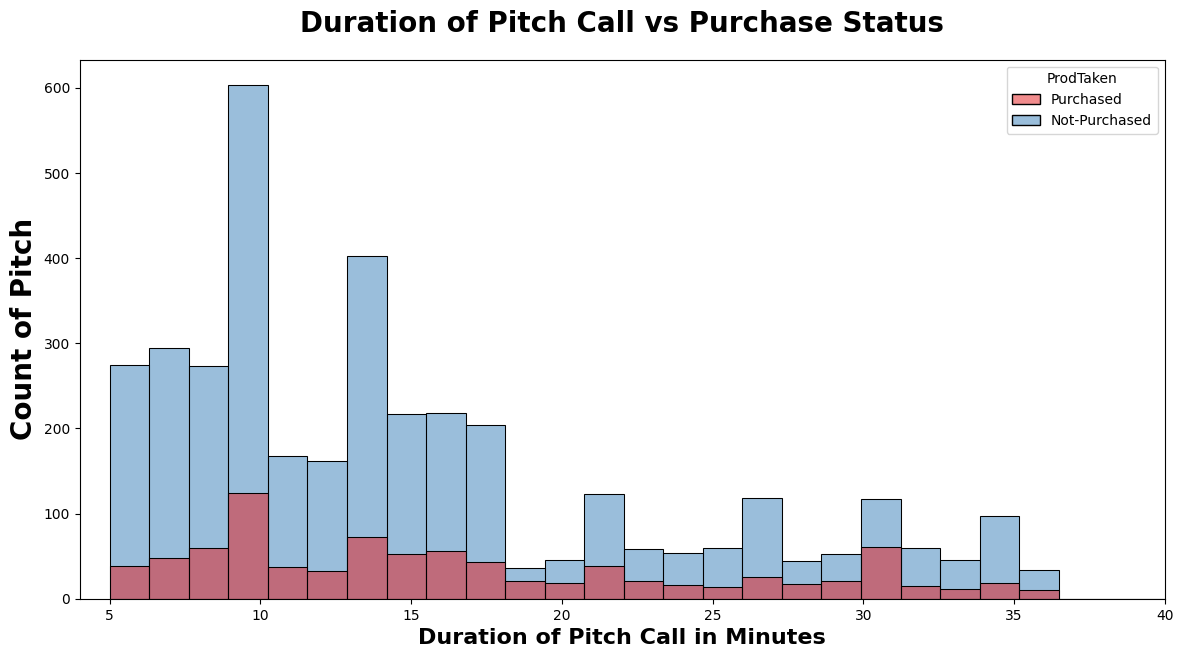

In [37]:
plt.subplots(figsize=(14, 7))
sns.histplot(x="DurationOfPitch", data=df1, palette="Set1", hue="ProdTaken")
plt.title(
    "Duration of Pitch Call vs Purchase Status", weight="bold", fontsize=20, pad=20
)
plt.ylabel("Count of Pitch", weight="bold", fontsize=20)
plt.xlabel("Duration of Pitch Call in Minutes", weight="bold", fontsize=16)
plt.xlim(4, 40)
plt.show()


In [38]:
print(
    f"""Out of total {total_package_taken} packages, \n 
{(pitch_less_10_and_taken/total_package_taken)*100:.2f}% comes from talking less than 10 minutes,\n 
{(pitch_between_10_30_and_taken/total_package_taken)*100:.2f}% comes from talking between 10 minutes and 30 minutes,\n 
{(pitch_more_than_30_and_taken/total_package_taken)*100:.2f}% comes from talking more than 30 minutes"""
)

Out of total 920 packages, 
 
24.57% comes from talking less than 10 minutes,
 
53.04% comes from talking between 10 minutes and 30 minutes,
 
9.35% comes from talking more than 30 minutes


##### Observations:-
- As per the chart duration of Pitch has Impact on Target Variable.
- 57% of package sold were pitch between 10 minutes and 30 minutes.
- For the pitch calls above 30 minutes has better success rate.

##### 4.4 Number of Persons visiting Vs Product Purchase
- NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer

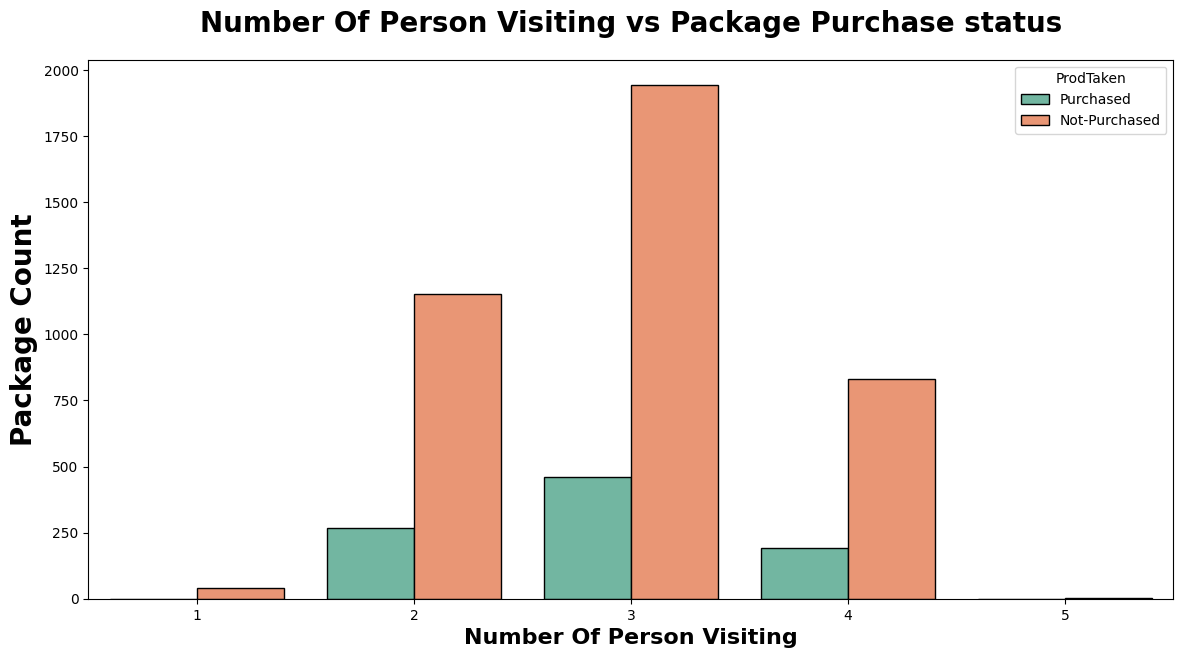

In [39]:
plt.subplots(figsize=(14, 7))
sns.countplot(
    x="NumberOfPersonVisiting", hue="ProdTaken", data=df1, ec="black", palette="Set2"
)
plt.title(
    "Number Of Person Visiting vs Package Purchase status",
    weight="bold",
    fontsize=20,
    pad=20,
)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Number Of Person Visiting", weight="bold", fontsize=16)
plt.show()

##### Observations:- 
- As per the Chart Most Purchase were from 3 People. That might be 3 Single Friends or a Family with Couple and a Child.
- Followed by 2 Number of Person which might be couples.

##### 4.6 Number of Sales Followup Vs Product Purchase

Create df2 which is data of who have purchased

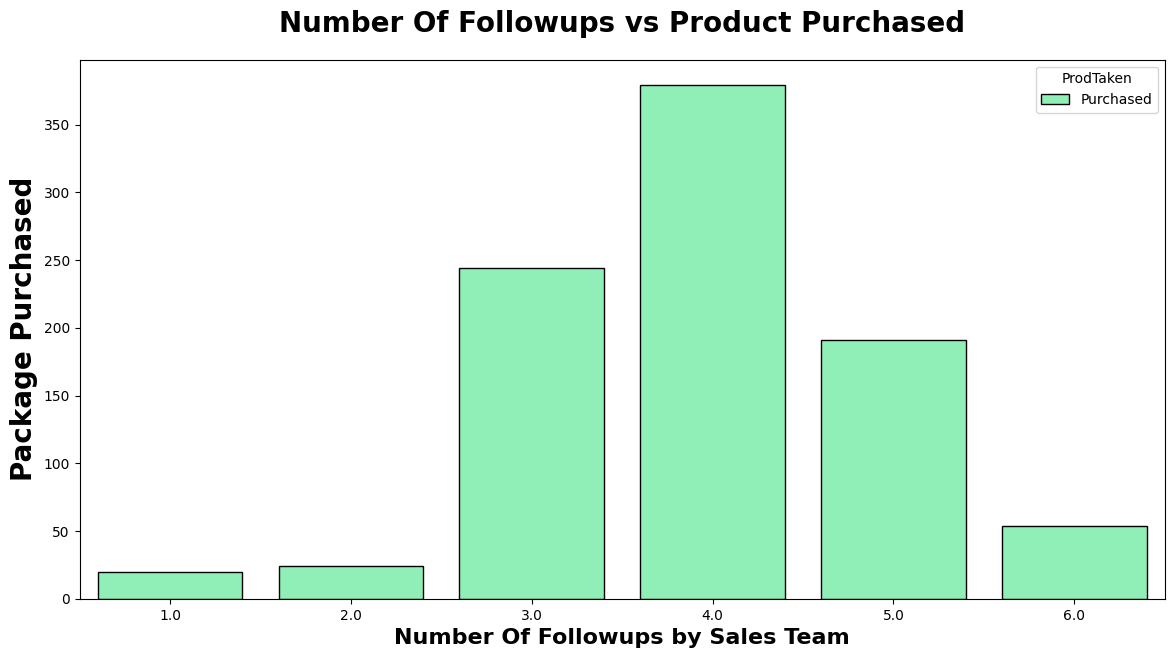

In [40]:
df2 = df1[df1['ProdTaken'] == 'Purchased']
plt.subplots(figsize=(14,7))
sns.countplot(
    x="NumberOfFollowups", hue="ProdTaken", data=df2, ec="black", palette="rainbow_r"
)
plt.title(
    "Number Of Followups vs Product Purchased", weight="bold", fontsize=20, pad=20
)
plt.ylabel("Package Purchased", weight="bold", fontsize=20)
plt.xlabel("Number Of Followups by Sales Team", weight="bold", fontsize=16)
plt.show()

##### Observations:-
- As per the Chart If Sales team Follows Ups for 4 times has better chance of purchasing
- Only One followup has least number of purchases

In [41]:
for i in range(1,7):
    followups_taken = df.loc[
        (df1['NumberOfFollowups']==i) & (df1['ProdTaken']=='Purchased')
    ].shape[0]
    followup_all = df.loc[(df1['NumberOfFollowups']==i)].shape[0]

    followup_ratio = followups_taken / followup_all

    print(f"For the follow up {i} Time, total number is {followup_all} and success ratio is {followup_ratio*100:.2f}%")

For the follow up 1 Time, total number is 176 and success ratio is 11.36%
For the follow up 2 Time, total number is 229 and success ratio is 10.48%
For the follow up 3 Time, total number is 1466 and success ratio is 16.64%
For the follow up 4 Time, total number is 2068 and success ratio is 18.33%
For the follow up 5 Time, total number is 768 and success ratio is 24.87%
For the follow up 6 Time, total number is 136 and success ratio is 39.71%


##### Observations:-
- Very few inquires has been followed for 5 and 6 times, and they have the highest ratio.
- For the 1 and 2 followup has less success ratio for product purchase.

##### 4.7 City Tier Vs Purchase Status

In [42]:
df1.groupby('CityTier').ProdTaken.value_counts()

CityTier  ProdTaken    
1         Not-Purchased    2670
          Purchased         520
2         Not-Purchased     152
          Purchased          46
3         Not-Purchased    1146
          Purchased         354
Name: ProdTaken, dtype: int64

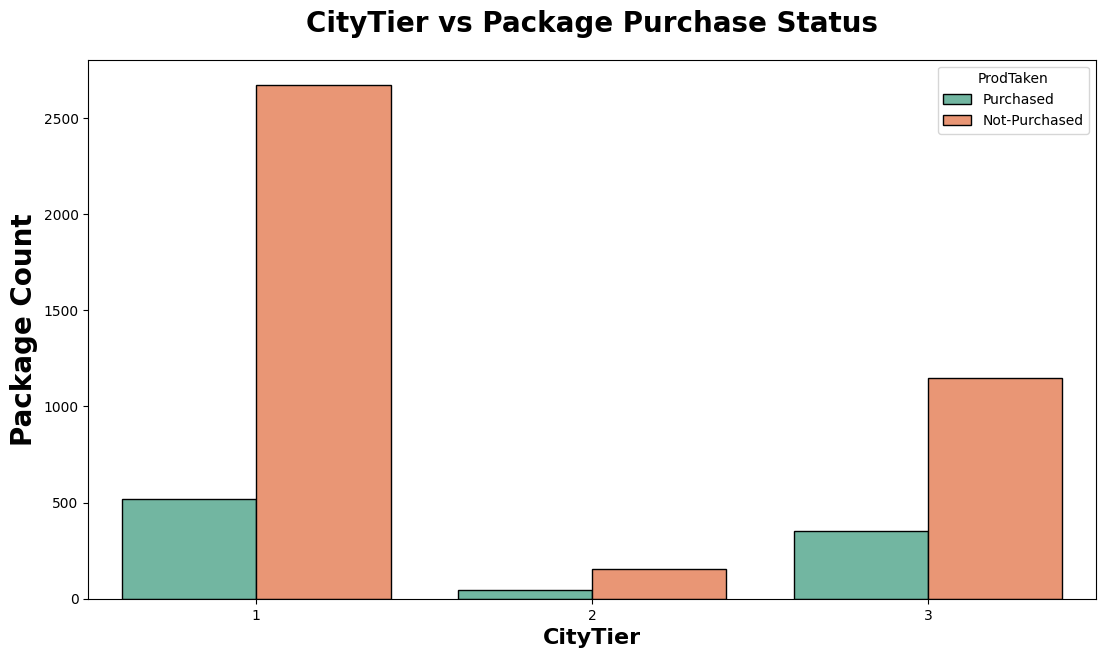

In [43]:
plt.subplots(figsize=(13, 7))
sns.countplot(x="CityTier", hue="ProdTaken", data=df1, ec="black", palette="Set2")
plt.title("CityTier vs Package Purchase Status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("CityTier", weight="bold", fontsize=16)
plt.show()

##### Observations:-
- Many customers are from City tier 1 compared to other tiers.
- CityTier has very good impact on target variable.

##### 4.7 Occupatin Vs Product Purchase

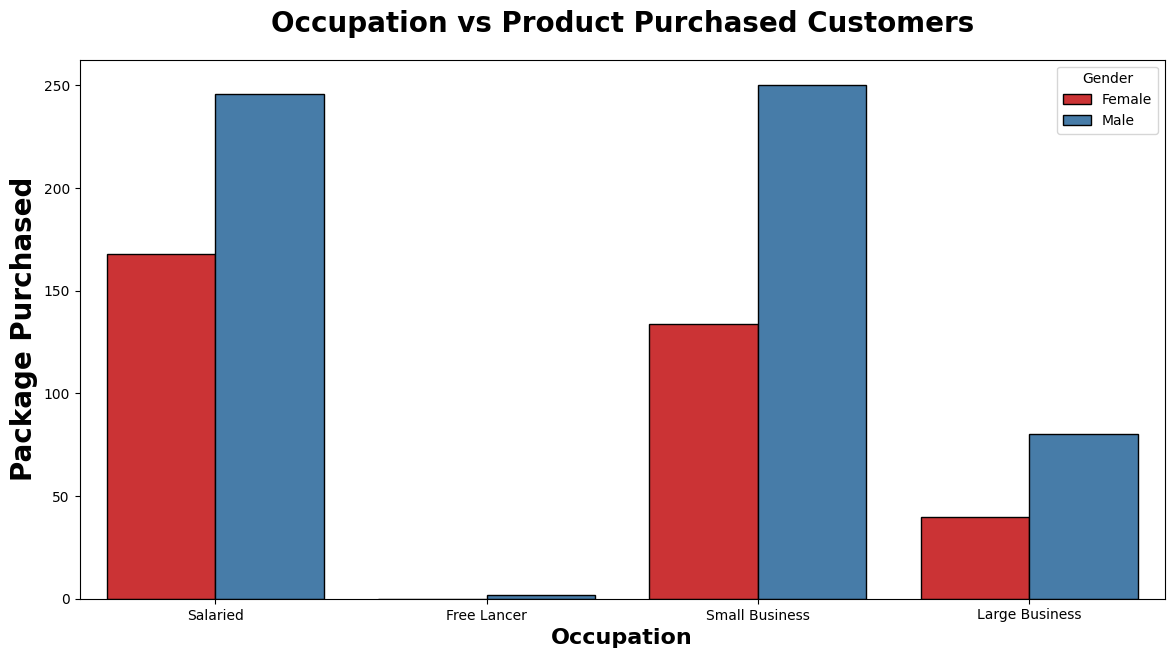

In [44]:
plt.subplots(figsize=(14, 7))
sns.countplot(x="Occupation", hue="Gender", data=df2, ec="black", palette="Set1")
plt.title(
    "Occupation vs Product Purchased Customers", weight="bold", fontsize=20, pad=20
)
plt.ylabel("Package Purchased", weight="bold", fontsize=20)
plt.xlabel("Occupation", weight="bold", fontsize=16)
plt.show()

##### Observations:-
- As Per Chart we can see Business Male have purchased more than Salaried Male.
- We can also see Salaried Female have purchased more Products than the Female with Small Business.
- FreeLancers were the least in count.

##### 4.8 Product Pitched and Product's Status

Products Pitched and Products sold

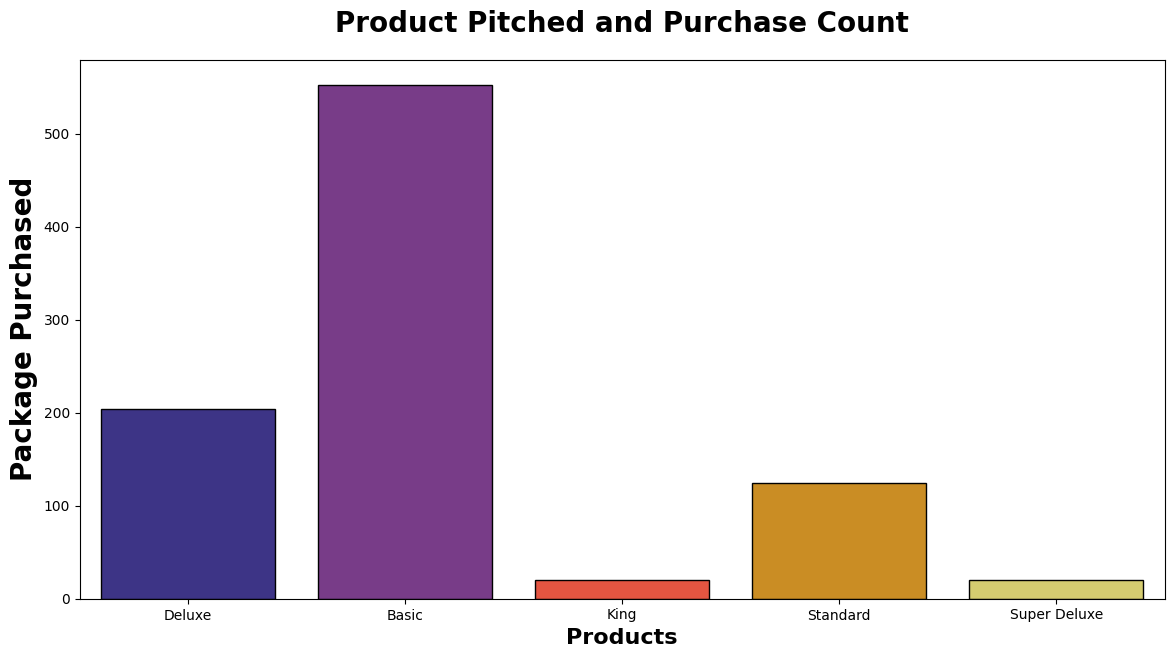

In [45]:
plt.subplots(figsize=(14, 7))
sns.countplot(x="ProductPitched", data=df2, ec="black", palette="CMRmap")
plt.title("Product Pitched and Purchase Count", weight="bold", fontsize=20, pad=20)
plt.ylabel("Package Purchased", weight="bold", fontsize=20)
plt.xlabel("Products", weight="bold", fontsize=16)
plt.show()

##### Observations:-
- Basic Package was the most preferred package by customers.
- Deluxe is Second more Purchased Package.
- King is the least purchased Package.

#### Products Pitched but Not Purchased

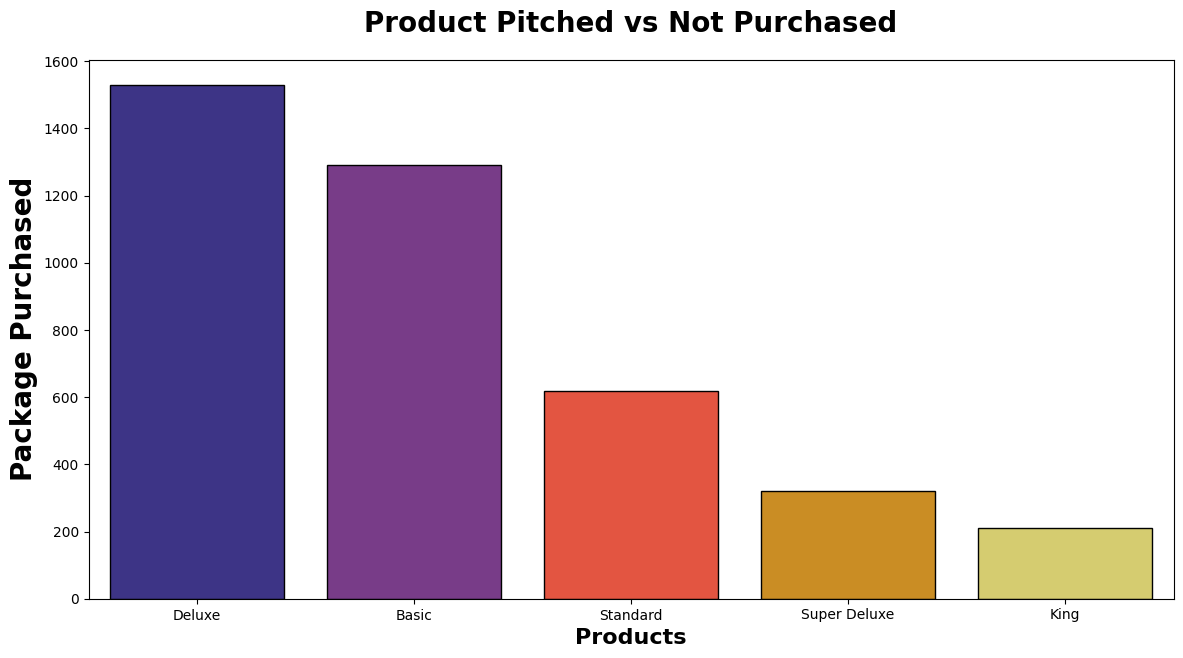

In [46]:
df3 = df1[df1['ProdTaken'] == "Not-Purchased"]
plt.subplots(figsize=(14, 7))
sns.countplot(x="ProductPitched", data=df3, ec="black", palette="CMRmap")
plt.title("Product Pitched vs Not Purchased", weight="bold", fontsize=20, pad=20)
plt.ylabel("Package Purchased", weight="bold", fontsize=20)
plt.xlabel("Products", weight="bold", fontsize=16)
plt.show()

##### Observations:- 

- Deluxe Package was the most Pitched package by Sales Yet People didnt buy it.
- Reducing the cost of Deluxe Package might help in getting sucessfull sales pitch.

##### 4.9 Preferred Property Star vs Product Purchase status

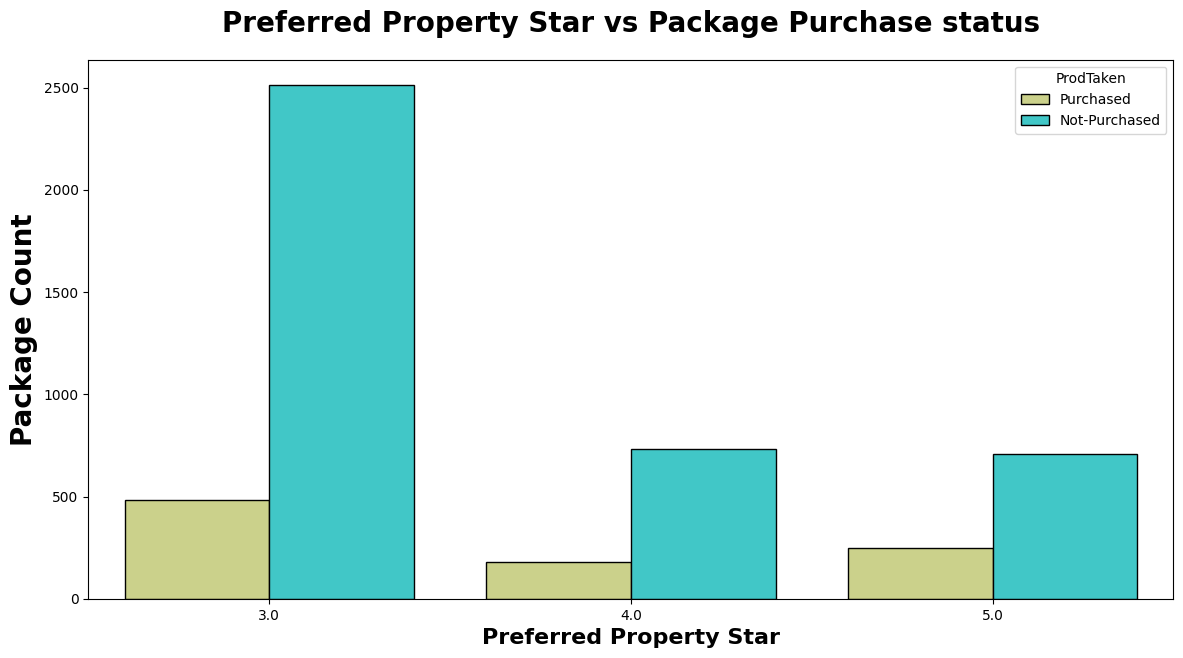

In [47]:
plt.subplots(figsize=(14, 7))
sns.countplot(
    x="PreferredPropertyStar",
    hue="ProdTaken",
    data=df1,
    ec="black",
    palette="rainbow_r",
)
plt.title(
    "Preferred Property Star vs Package Purchase status",
    weight="bold",
    fontsize=20,
    pad=20,
)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Preferred Property Star", weight="bold", fontsize=16)
plt.show()

##### Observations:- 
- People Purchased More 3 Star Hotels Followed by 5 Stars and 4 Stars.

##### 4.10 Passposrt Vs Package Purchase

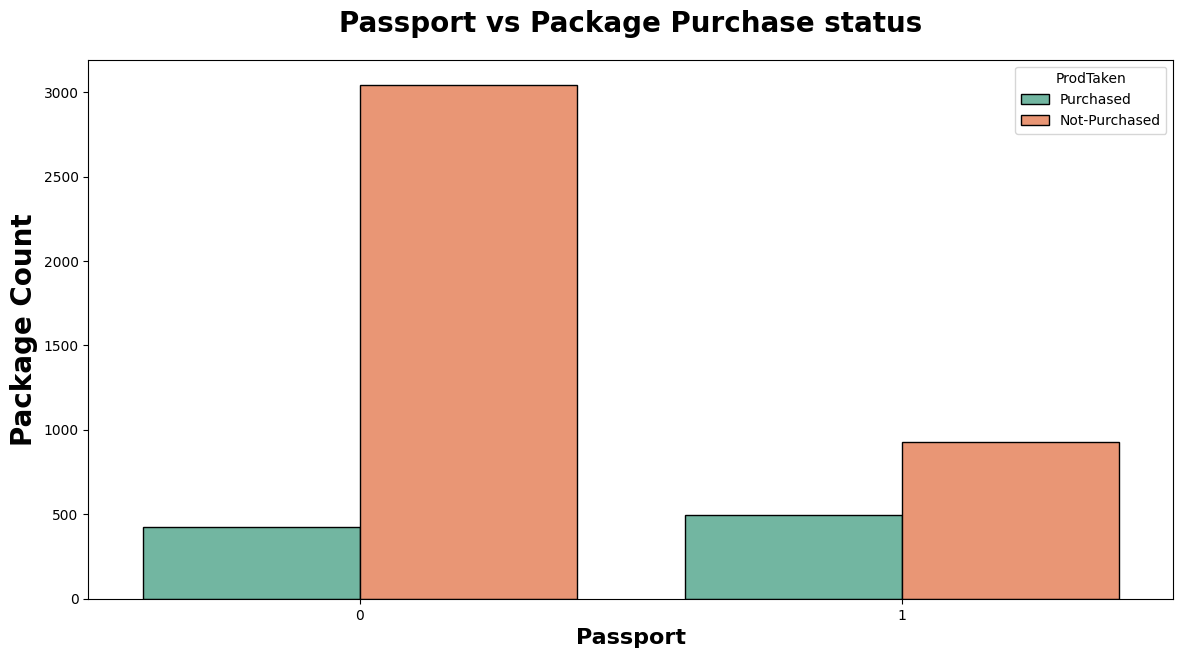

In [48]:
plt.subplots(figsize=(14, 7))
sns.countplot(x="Passport", hue="ProdTaken", data=df1, ec="black", palette="Set2")
plt.title("Passport vs Package Purchase status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Passport", weight="bold", fontsize=16)
plt.show()

##### Observations:-
- People Most people who had Passport had purchased the package.
- Poeple with No passport mostly didn't Purchase the package.

#### Number of Trips vs Package Purchased

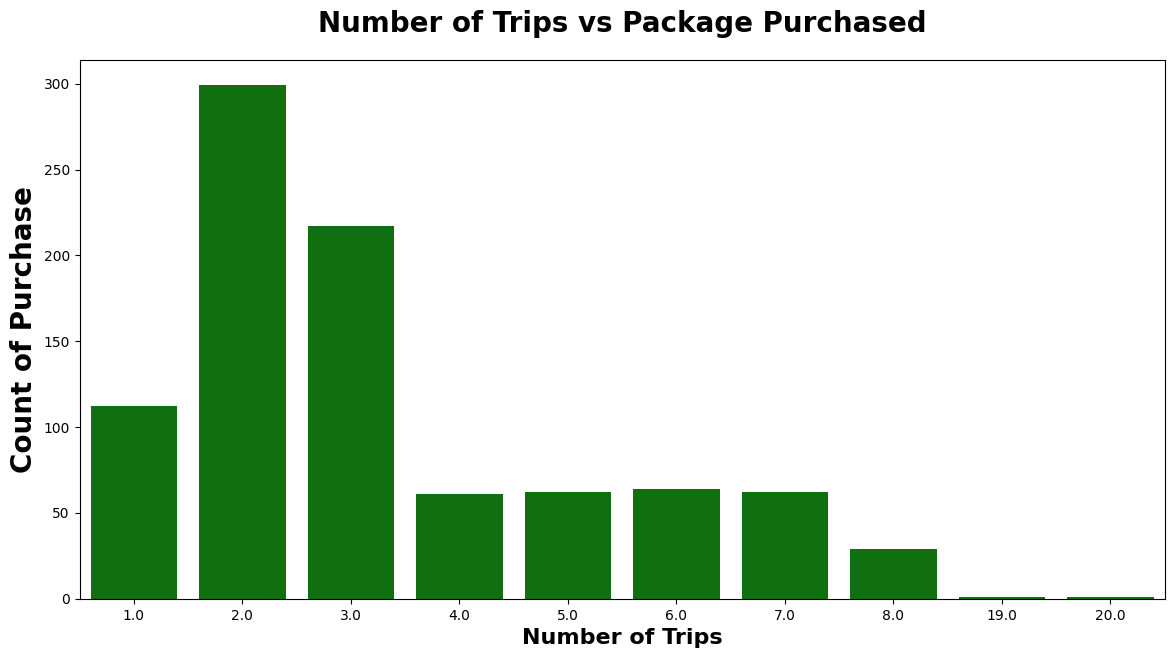

In [49]:
# Plot Line Chart
plt.figure(figsize=(14, 7))
sns.countplot(x=df2.NumberOfTrips, color="g")
plt.title("Number of Trips vs Package Purchased", weight="bold", fontsize=20, pad=20)
plt.xlabel("Number of Trips", weight="bold", fontsize=16)
plt.ylabel("Count of Purchase", weight="bold", fontsize=20)
plt.show()

##### Observations:- 
- People with history of 2 Trips had more purchase.
- People with history more than 8 Trips make no purchase.

##### 4.11 Own car vs Products Purchase

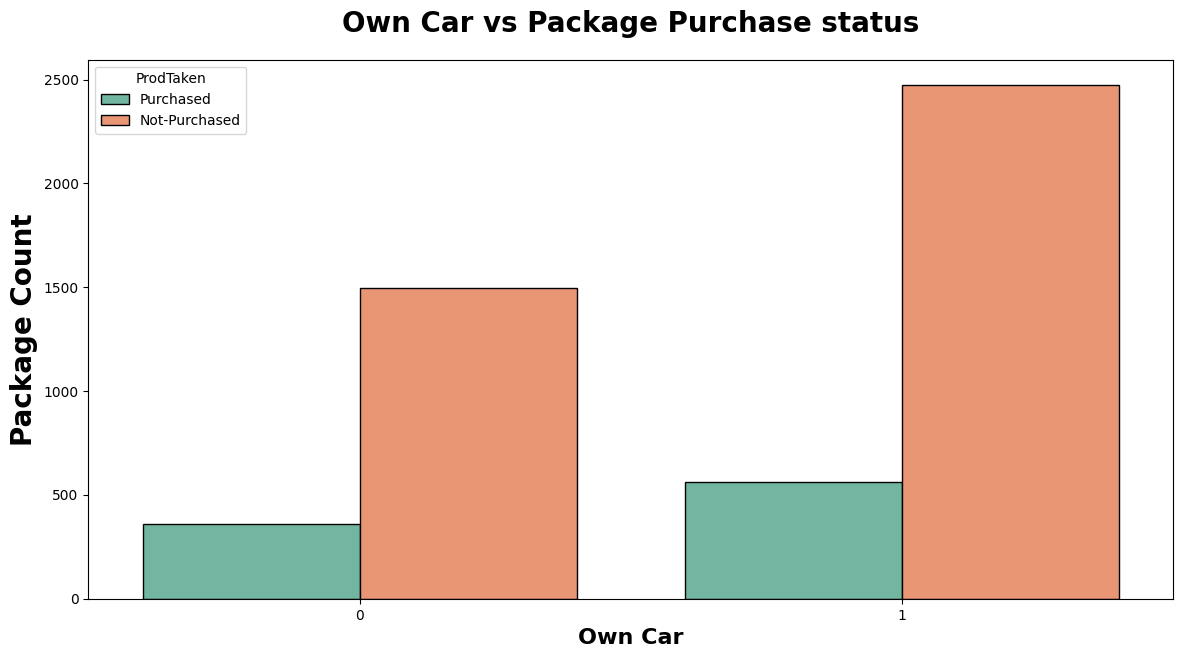

In [50]:
plt.subplots(figsize=(14, 7))
sns.countplot(x="OwnCar", hue="ProdTaken", data=df1, ec="black", palette="Set2")
plt.title("Own Car vs Package Purchase status", weight="bold", fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Own Car", weight="bold", fontsize=16)
plt.show()

##### Observations:-
- Its Observed that People with Car (Higher Income Category) have made more Purchase

##### 4.12 Number of Children visit vs Package purchase

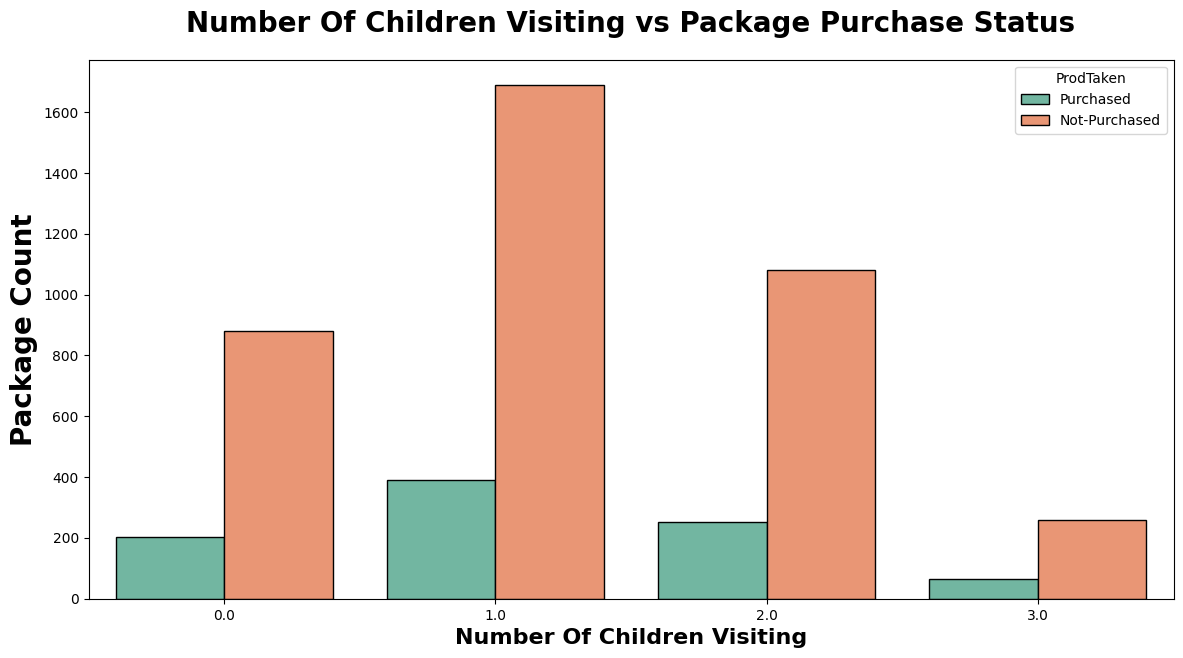

In [51]:
plt.subplots(figsize=(14, 7))
sns.countplot(
    x="NumberOfChildrenVisiting", hue="ProdTaken", data=df1, ec="black", palette="Set2"
)
plt.title(
    "Number Of Children Visiting vs Package Purchase Status",
    weight="bold",
    fontsize=20,
    pad=20,
)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Number Of Children Visiting", weight="bold", fontsize=16)
plt.show()

##### Observations:-
- People with 1 Child has puchased the package more,
- Earlier it was observed that the more purchases were made by people with group of 3. This could be a family with a single child.

##### 4.13 Designation vs Package Purchased

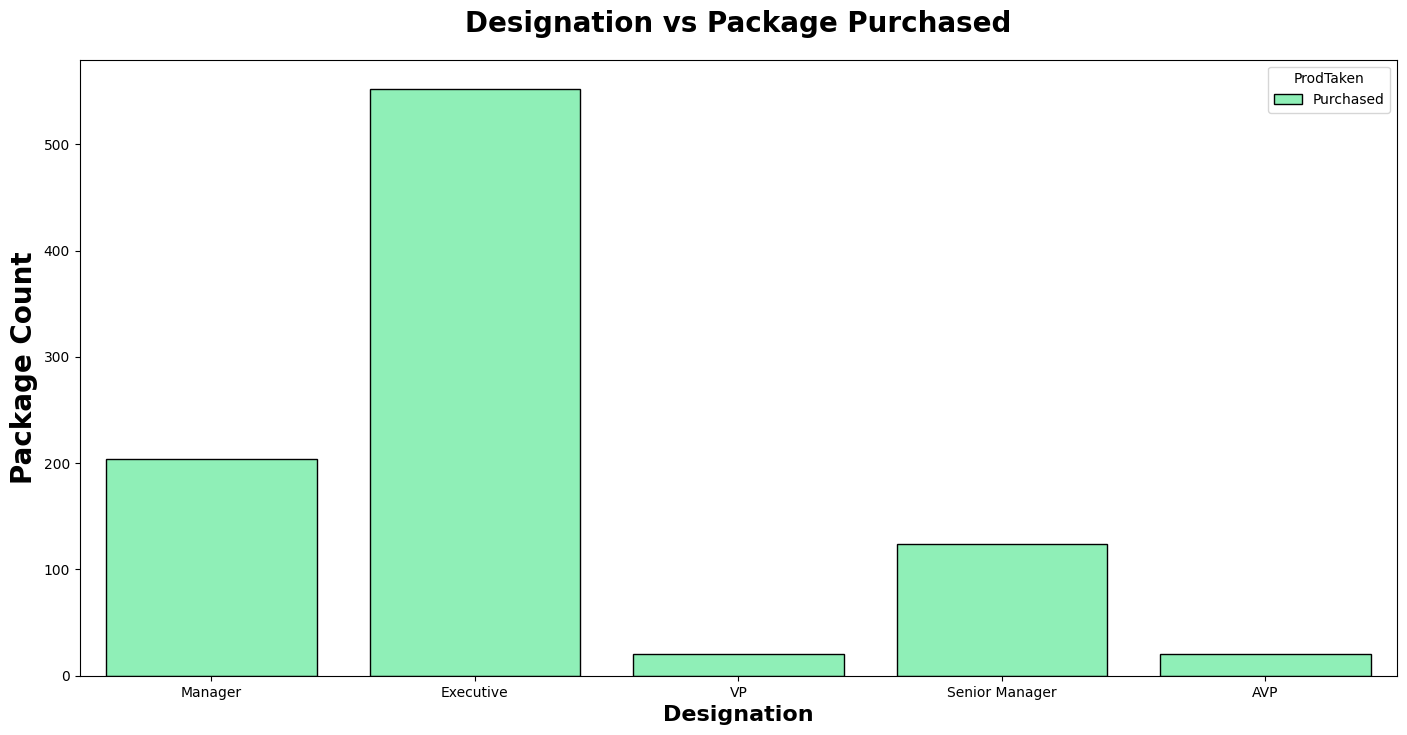

In [52]:
plt.subplots(figsize=(17, 8))
sns.countplot(
    x="Designation", hue="ProdTaken", data=df2, ec="black", palette="rainbow_r"
)
plt.title("Designation vs Package Purchased", weight="bold", fontsize=20, pad=20)
plt.ylabel("Package Count", weight="bold", fontsize=20)
plt.xlabel("Designation", weight="bold", fontsize=16)
plt.show()

##### Observations:-
- Executive has purchased the Product more than other designation.
- This feature has very good impact on target variable.

### Final Report
- The Column names and Data types are correct, but there are Spelling errors in the Gender column.
- The ProdTaken column is the target to predict.
- There are outliers in the DurationOfPitch, NumberOfTrips, MonthlyIncome columns.
- The NumberOfPersonVisiting and NumberOfChildrenVisiting columns have a positive correlation they can be combined to form a new feature.
- By Chi2 Test we infer that OwnCar column is not correlated to target column.
- Follow Ups on sales pitch more than 3 times has given good results.
- Numeric fields that appear to have a correlation to the target can be used as features, namely Age, MontlyIncome, NumberOfFollowups and Passport.
- Sales Pitch for 5 to 20 minutes is a very good range.